# Task 1: Load and Build Graphs


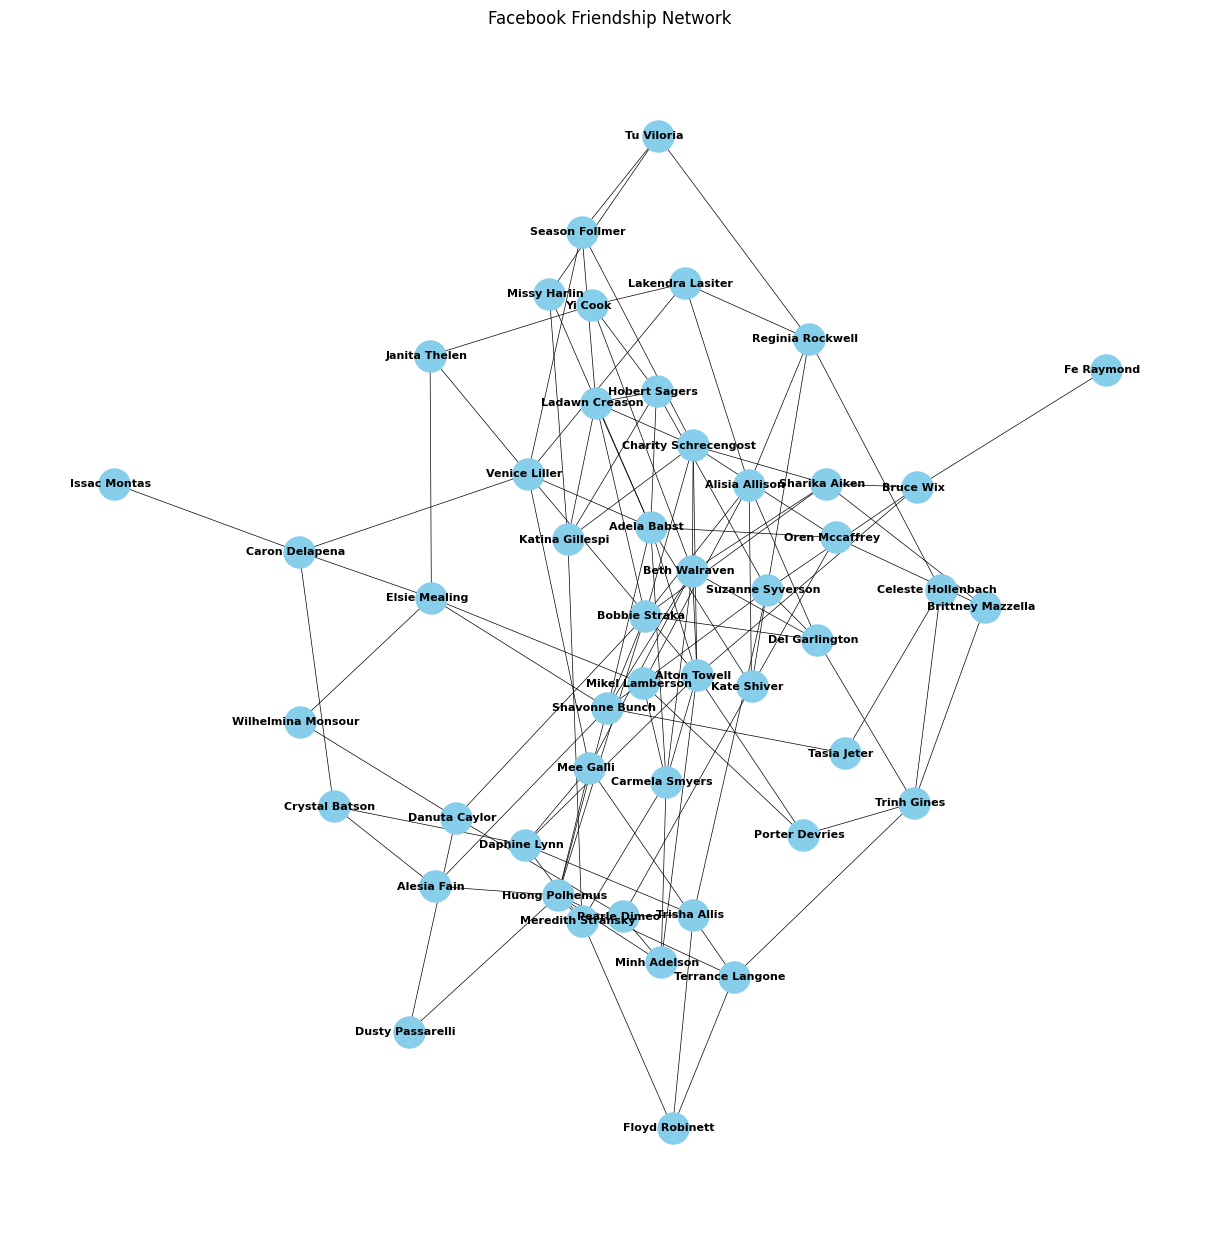

In [ ]:


import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Install necessary libraries if not already installed
!pip install pandas
!pip install networkx
!pip install matplotlib

# Load the Excel file into a pandas DataFrame
try:
    df = pd.read_excel('Facebook_Data.xlsx', index_col=0)
except FileNotFoundError:
    print("Error: 'Facebook_Data.xlsx' not found. Please upload the file.")
    exit()

# Create an undirected graph
graph = nx.Graph()

# Add nodes (names) to the graph
names = df.index.tolist()
graph.add_nodes_from(names)

# Add edges based on the connections (1s) in the DataFrame
for i in range(len(names)):
    for j in range(i + 1, len(names)):  # Avoid duplicate edges and self-loops
        if df.iloc[i, j] == 1:
            graph.add_edge(names[i], names[j])


# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=500, font_size=8, font_weight='bold', width=0.5)
plt.title("Facebook Friendship Network")
plt.show()


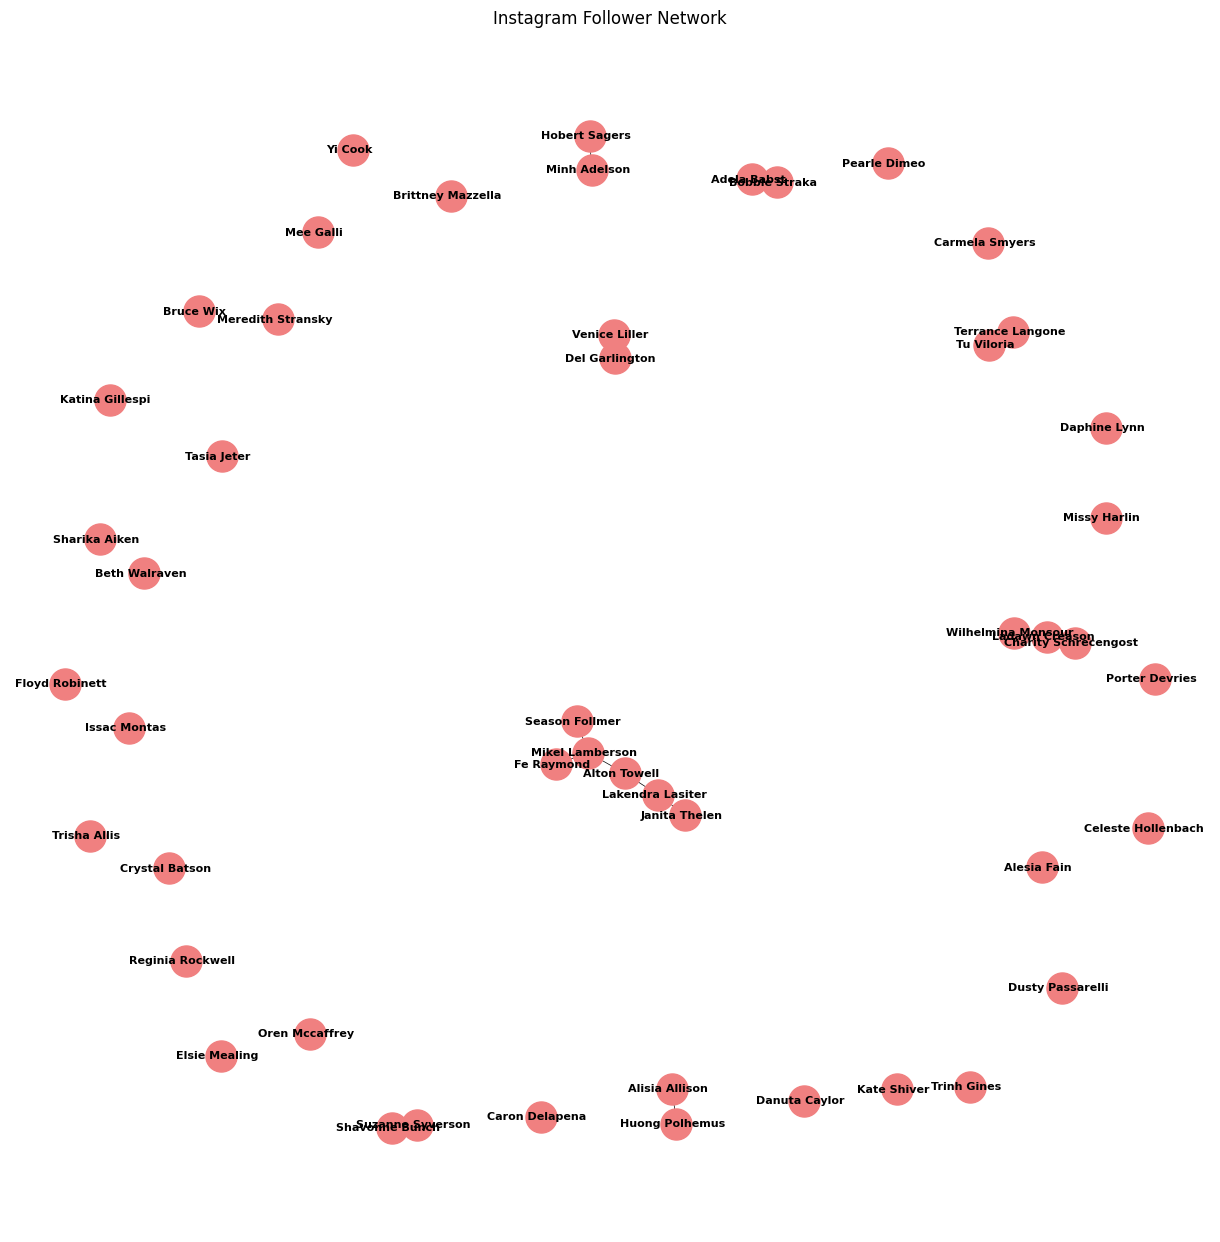

In [ ]:


import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the Excel file into a pandas DataFrame
try:
    df_insta = pd.read_excel('Instagram_Data.xlsx', index_col=0)
except FileNotFoundError:
    print("Error: 'Instagram_Data.xlsx' not found. Please upload the file.")
    exit()

# Create an undirected graph
graph_insta = nx.Graph()

# Add nodes (names) to the graph
names_insta = df_insta.index.tolist()
graph_insta.add_nodes_from(names_insta)

# Add edges based on the connections (1s) in the DataFrame
for i in range(len(names_insta)):
    for j in range(i + 1, len(names_insta)):  # Avoid duplicate edges and self-loops
        if df_insta.iloc[i, j] == 1:
            graph_insta.add_edge(names_insta[i], names_insta[j])

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(graph_insta, with_labels=True, node_color='lightcoral', node_size=500, font_size=8, font_weight='bold', width=0.5)
plt.title("Instagram Follower Network")
plt.show()


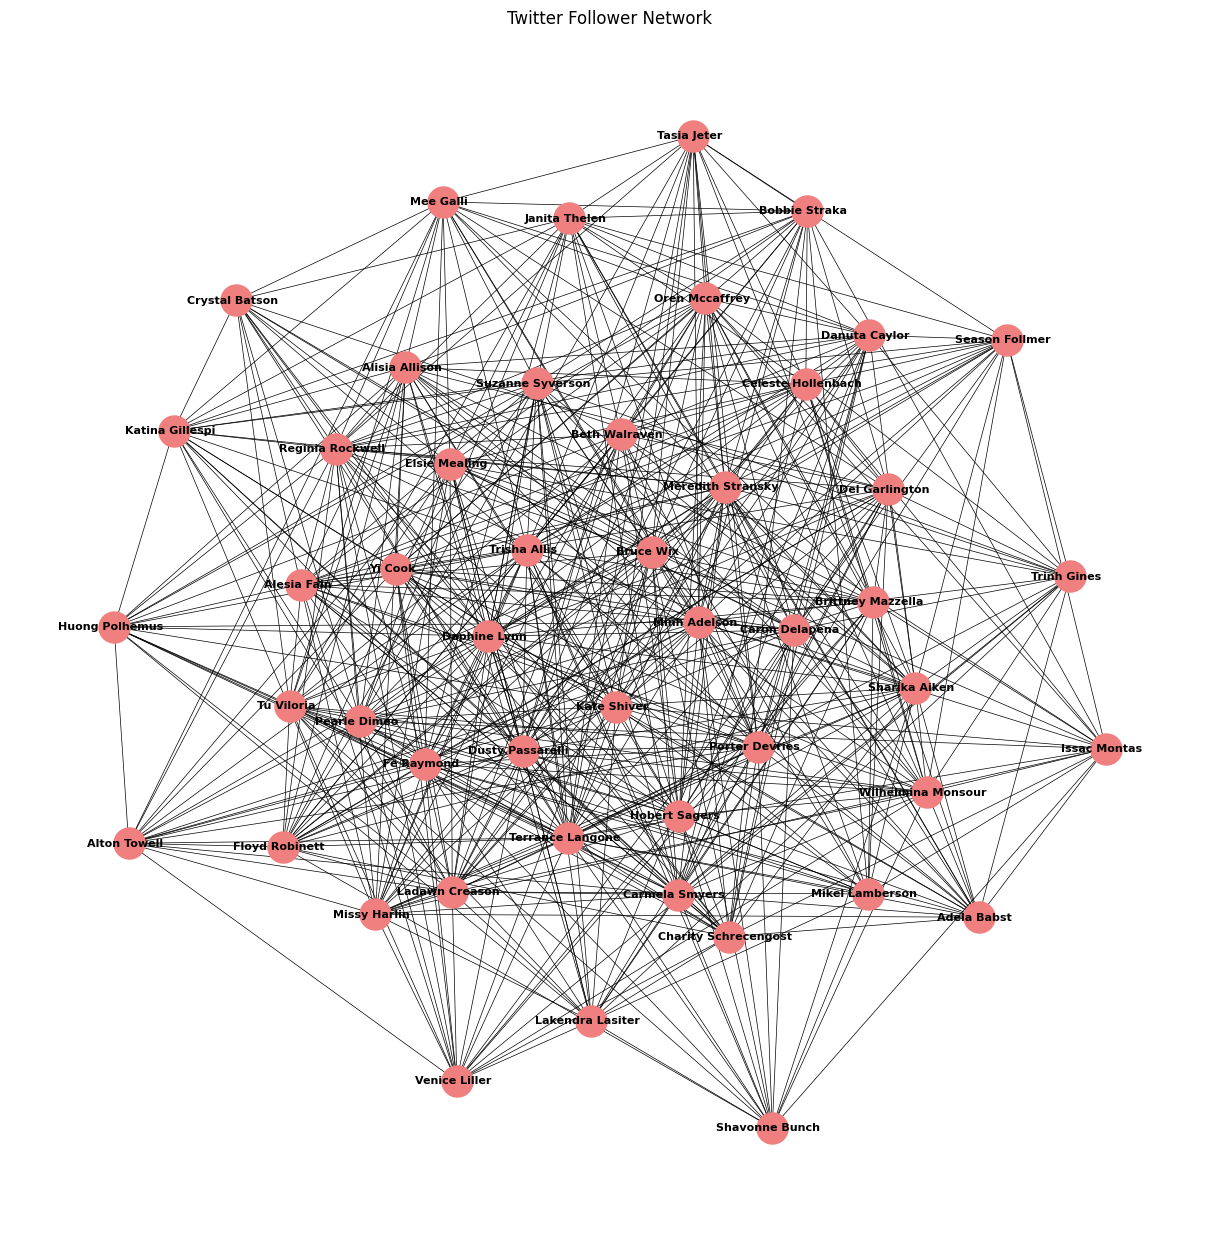

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the Excel file into a pandas DataFrame
try:
    df_tw = pd.read_excel('Twitter_Data.xlsx', index_col=0)
except FileNotFoundError:
    print("Error: 'Twitter_Data.xlsx' not found. Please upload the file.")
    exit()

# Create an undirected graph
graph_tw = nx.Graph()

# Add nodes (names) to the graph
names_tw = df_tw.index.tolist()
graph_tw.add_nodes_from(names_tw)

# Add edges based on the connections (1s) in the DataFrame
for i in range(len(names_tw)):
    for j in range(i + 1, len(names_tw)):  # Avoid duplicate edges and self-loops
        if df_tw.iloc[i, j] == 1:
            graph_tw.add_edge(names_tw[i], names_tw[j])

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(graph_tw, with_labels=True, node_color='lightcoral', node_size=500, font_size=8, font_weight='bold', width=0.5)
plt.title("Twitter Follower Network")
plt.show()


I chose to do the undirected graphs since I beleive it would've been more effective in showing the connections on the graphs since there are 3 social media platforms. If it was directed it would just show the connection between the two but not all three of them. Not only that but for the individual platforms one person might have multiple connections so the undirected graph could account for all that.

# Task 2: Basic Network Properties

In [ ]:
# for each platform I'm computing
# • Number of nodes and edges
# • Average degree
# • Number of connected components (for undirected graphs)

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def analyze_graph(graph, platform_name):
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    avg_degree = 2 * num_edges / num_nodes if num_nodes > 0 else 0
    num_connected_components = nx.number_connected_components(graph)

    print(f"--- {platform_name} Network Analysis ---")
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")
    print(f"Average degree: {avg_degree:.2f}")
    print(f"Number of connected components: {num_connected_components}")
    print("-----------------------------------\n")


# Load and analyze Facebook data
try:
    df = pd.read_excel('Facebook_Data.xlsx', index_col=0)
    graph = nx.Graph()
    names = df.index.tolist()
    graph.add_nodes_from(names)
    for i in range(len(names)):
        for j in range(i + 1, len(names)):
            if df.iloc[i, j] == 1:
                graph.add_edge(names[i], names[j])
    analyze_graph(graph, "Facebook")
except FileNotFoundError:
    print("Error: 'Facebook_Data.xlsx' not found.")

# Load and analyze Instagram data
try:
    df_insta = pd.read_excel('Instagram_Data.xlsx', index_col=0)
    graph_insta = nx.Graph()
    names_insta = df_insta.index.tolist()
    graph_insta.add_nodes_from(names_insta)
    for i in range(len(names_insta)):
        for j in range(i + 1, len(names_insta)):
            if df_insta.iloc[i, j] == 1:
                graph_insta.add_edge(names_insta[i], names_insta[j])
    analyze_graph(graph_insta, "Instagram")
except FileNotFoundError:
    print("Error: 'Instagram_Data.xlsx' not found.")


# Load and analyze Twitter data
try:
    df_tw = pd.read_excel('Twitter_Data.xlsx', index_col=0)
    graph_tw = nx.Graph()
    names_tw = df_tw.index.tolist()
    graph_tw.add_nodes_from(names_tw)
    for i in range(len(names_tw)):
        for j in range(i + 1, len(names_tw)):
            if df_tw.iloc[i, j] == 1:
                graph_tw.add_edge(names_tw[i], names_tw[j])
    analyze_graph(graph_tw, "Twitter")
except FileNotFoundError:
    print("Error: 'Twitter_Data.xlsx' not found.")


--- Facebook Network Analysis ---
Number of nodes: 49
Number of edges: 115
Average degree: 4.69
Number of connected components: 1
-----------------------------------

--- Instagram Network Analysis ---
Number of nodes: 49
Number of edges: 13
Average degree: 0.53
Number of connected components: 36
-----------------------------------

--- Twitter Network Analysis ---
Number of nodes: 49
Number of edges: 546
Average degree: 22.29
Number of connected components: 1
-----------------------------------



# Task 3: Centrality Analysis

In [ ]:
# computing the following centrality metrics:
# • Degree Centrality
# • Betweenness Centrality
# • Closeness Centrality
# Identifying the top 5 users (nodes) for each metric. I'll discuss what kind of roles these users may be playing in
# the network.

import pandas as pd
import networkx as nx

def analyze_centrality(graph, platform_name):
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)

    print(f"\n--- {platform_name} Centrality Analysis ---")

    def print_top_nodes(centrality_measure, metric_name):
        sorted_centrality = sorted(centrality_measure.items(), key=lambda item: item[1], reverse=True)
        print(f"\nTop 5 nodes by {metric_name}:")
        for node, centrality in sorted_centrality[:5]:
            print(f"  {node}: {centrality:.4f}")

    print_top_nodes(degree_centrality, "Degree Centrality")
    print_top_nodes(betweenness_centrality, "Betweenness Centrality")
    print_top_nodes(closeness_centrality, "Closeness Centrality")
    print("-----------------------------------\n")


# Assuming 'graph', 'graph_insta', and 'graph_tw' are defined from previous code

analyze_centrality(graph, "Facebook")
analyze_centrality(graph_insta, "Instagram")
analyze_centrality(graph_tw, "Twitter")



--- Facebook Centrality Analysis ---

Top 5 nodes by Degree Centrality:
  Alton Towell  : 0.1875
  Adela Babst  : 0.1875
  Huong Polhemus  : 0.1667
  Bobbie Straka  : 0.1667
  Charity Schrecengost  : 0.1667

Top 5 nodes by Betweenness Centrality:
  Shavonne Bunch  : 0.1239
  Venice Liller  : 0.1059
  Alton Towell  : 0.1055
  Adela Babst  : 0.0984
  Bobbie Straka  : 0.0890

Top 5 nodes by Closeness Centrality:
  Shavonne Bunch  : 0.4800
  Adela Babst  : 0.4752
  Alton Towell  : 0.4706
  Bobbie Straka  : 0.4615
  Beth Walraven  : 0.4615
-----------------------------------


--- Instagram Centrality Analysis ---

Top 5 nodes by Degree Centrality:
  Mikel Lamberson  : 0.0625
  Ladawn Creason  : 0.0417
  Lakendra Lasiter  : 0.0417
  Alton Towell  : 0.0417
  Suzanne Syverson  : 0.0208

Top 5 nodes by Betweenness Centrality:
  Mikel Lamberson  : 0.0062
  Alton Towell  : 0.0053
  Lakendra Lasiter  : 0.0035
  Ladawn Creason  : 0.0009
  Meredith Stransky  : 0.0000

Top 5 nodes by Closeness Cent

For Degree Centrality it can play a big role in seeing a direct connection so for example this person is directly friends with another person. For betweeness centrality it cna mean a more distant connection like person A is friends with person b and person b is friend with person c so there would be some betweeness there. For Closeness Centrality these users are able to access a lot of users due to the friends/connections they have.

# Task 4: Community Detection

In [ ]:
# Applying one of the community detection algorithms (e.g., Louvain/ Greedy Modularity/ Label Propagation)
# on at least one platform with a specific seed if needed.
# reporting on
# • Number of communities
# • Size of each community
# • Top 5 most central users per community

import community as community_louvain
import community.community_louvain as community_louvain

def analyze_communities(graph, platform_name):
    # Apply Louvain algorithm for community detection
    partition = community_louvain.best_partition(graph)

    # Analyze the results
    num_communities = len(set(partition.values()))
    print(f"\n--- {platform_name} Community Detection ---")
    print(f"Number of communities: {num_communities}")

    community_sizes = {}
    for community_id in set(partition.values()):
        community_sizes[community_id] = sum(1 for node, comm in partition.items() if comm == community_id)
        print(f"Community {community_id} size: {community_sizes[community_id]}")

    # Calculate degree centrality within each community
    for community_id in set(partition.values()):
        community_nodes = [node for node, comm in partition.items() if comm == community_id]
        subgraph = graph.subgraph(community_nodes)
        degree_centrality = nx.degree_centrality(subgraph)

        sorted_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

        print(f"\nTop 5 most central users in community {community_id}:")
        for node, centrality in sorted_centrality[:5]:
          print(f" {node}: {centrality:.4f}")

    print("-----------------------------------\n")

# Assuming 'graph', 'graph_insta', and 'graph_tw' are defined from previous code

analyze_communities(graph, "Facebook")
analyze_communities(graph_insta, "Instagram")
analyze_communities(graph_tw, "Twitter")



--- Facebook Community Detection ---
Number of communities: 6
Community 0 size: 10
Community 1 size: 12
Community 2 size: 8
Community 3 size: 2
Community 4 size: 9
Community 5 size: 8

Top 5 most central users in community 0:
 Huong Polhemus  : 0.4444
 Meredith Stransky  : 0.4444
 Pearle Dimeo  : 0.3333
 Trisha Allis  : 0.3333
 Floyd Robinett  : 0.3333

Top 5 most central users in community 1:
 Reginia Rockwell  : 0.3636
 Alisia Allison  : 0.3636
 Suzanne Syverson  : 0.3636
 Celeste Hollenbach  : 0.2727
 Trinh Gines  : 0.2727

Top 5 most central users in community 2:
 Alton Towell  : 0.7143
 Carmela Smyers  : 0.5714
 Beth Walraven  : 0.4286
 Venice Liller  : 0.4286
 Adela Babst  : 0.4286

Top 5 most central users in community 3:
 Fe Raymond  : 1.0000
 Bruce Wix  : 1.0000

Top 5 most central users in community 4:
 Ladawn Creason  : 0.6250
 Charity Schrecengost  : 0.6250
 Katina Gillespi  : 0.5000
 Season Follmer  : 0.3750
 Bobbie Straka  : 0.3750

Top 5 most central users in community 

As far as some insights go I see Bruce wix as one of the names that's popping up a few times. So he's probably a good central user meaning that he's able to connect and reach out to many people across the various platforms more effectively. I'm seeing the same thing with Pearle Dimeo whos name pops up a few times. As far as any anomalies I'm not seeing any based off the results.

# Task 5: Visualization

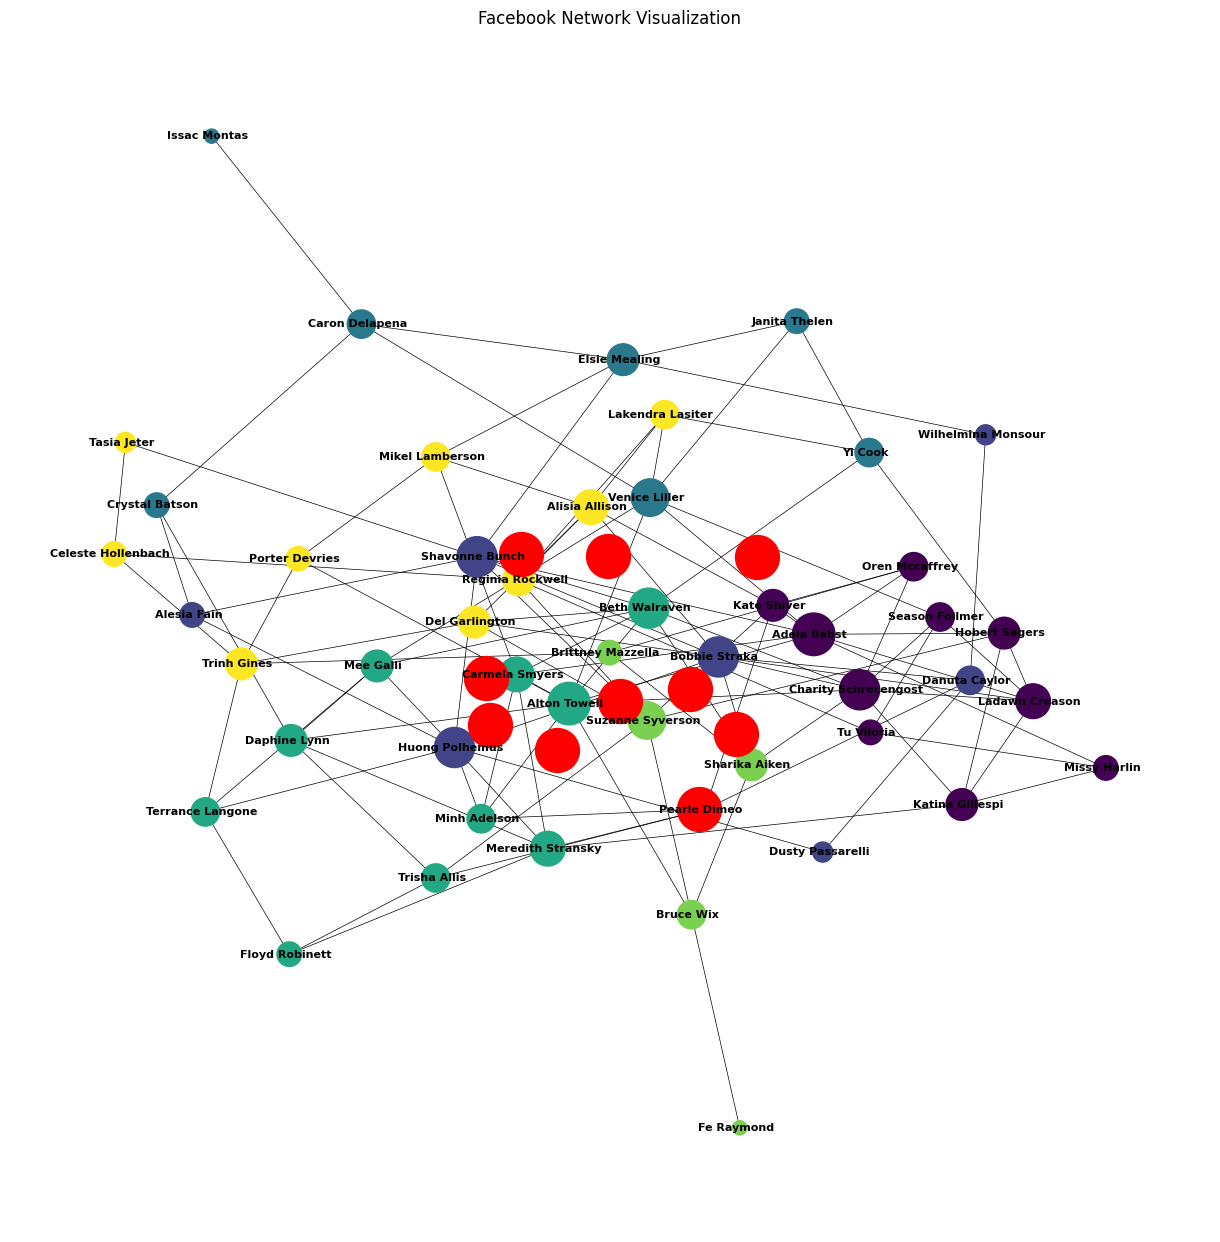

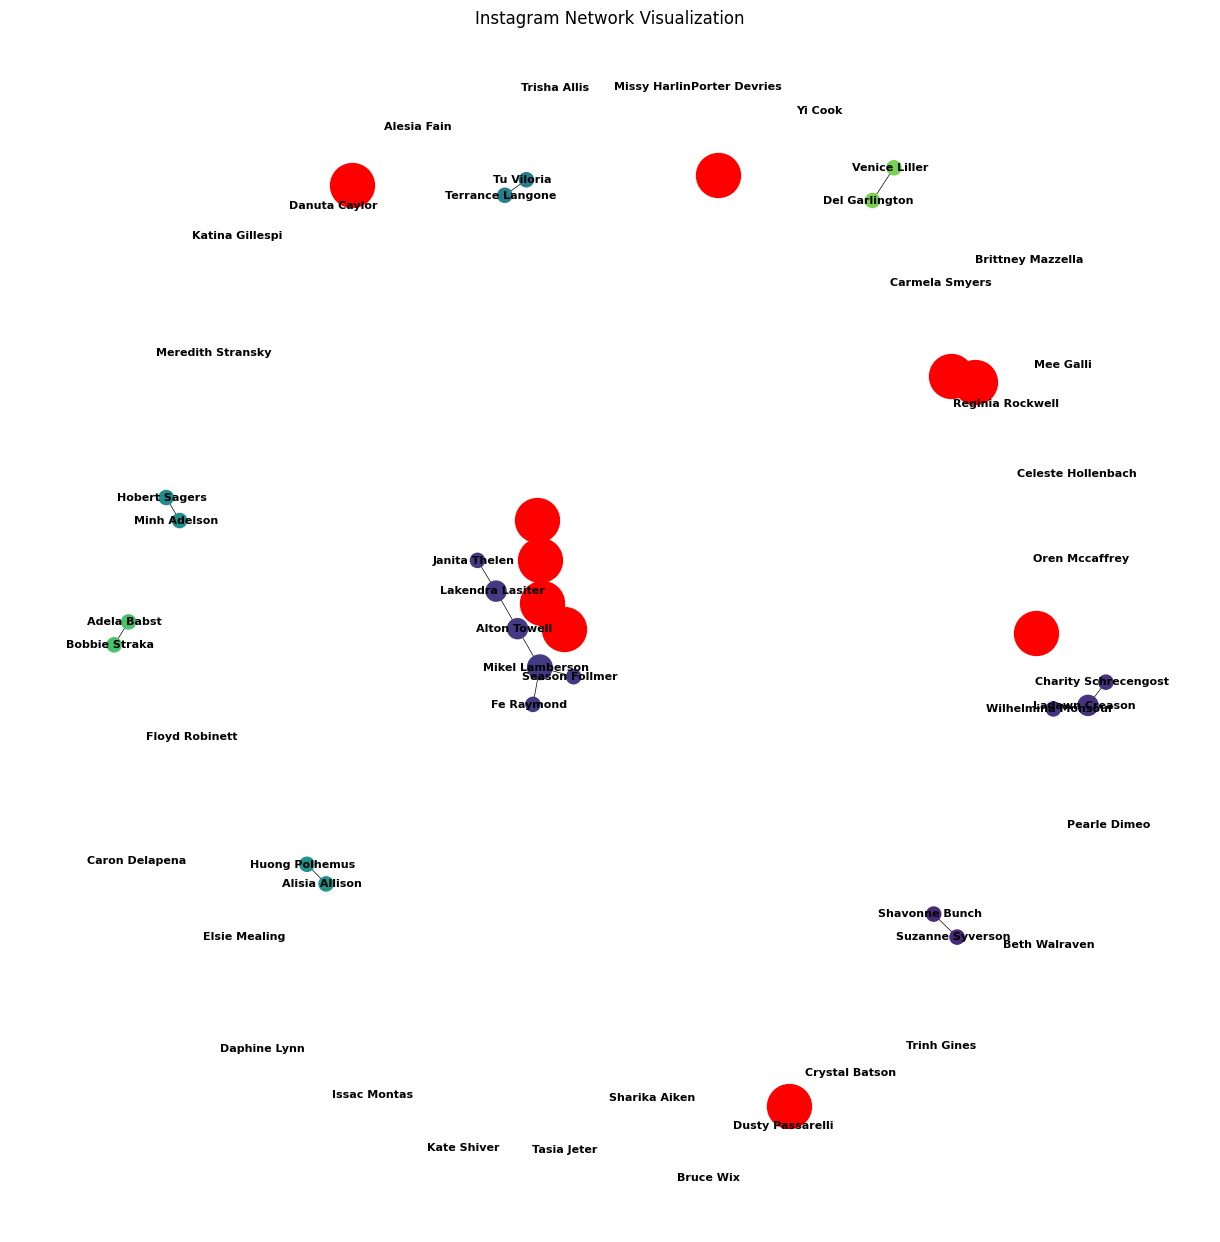

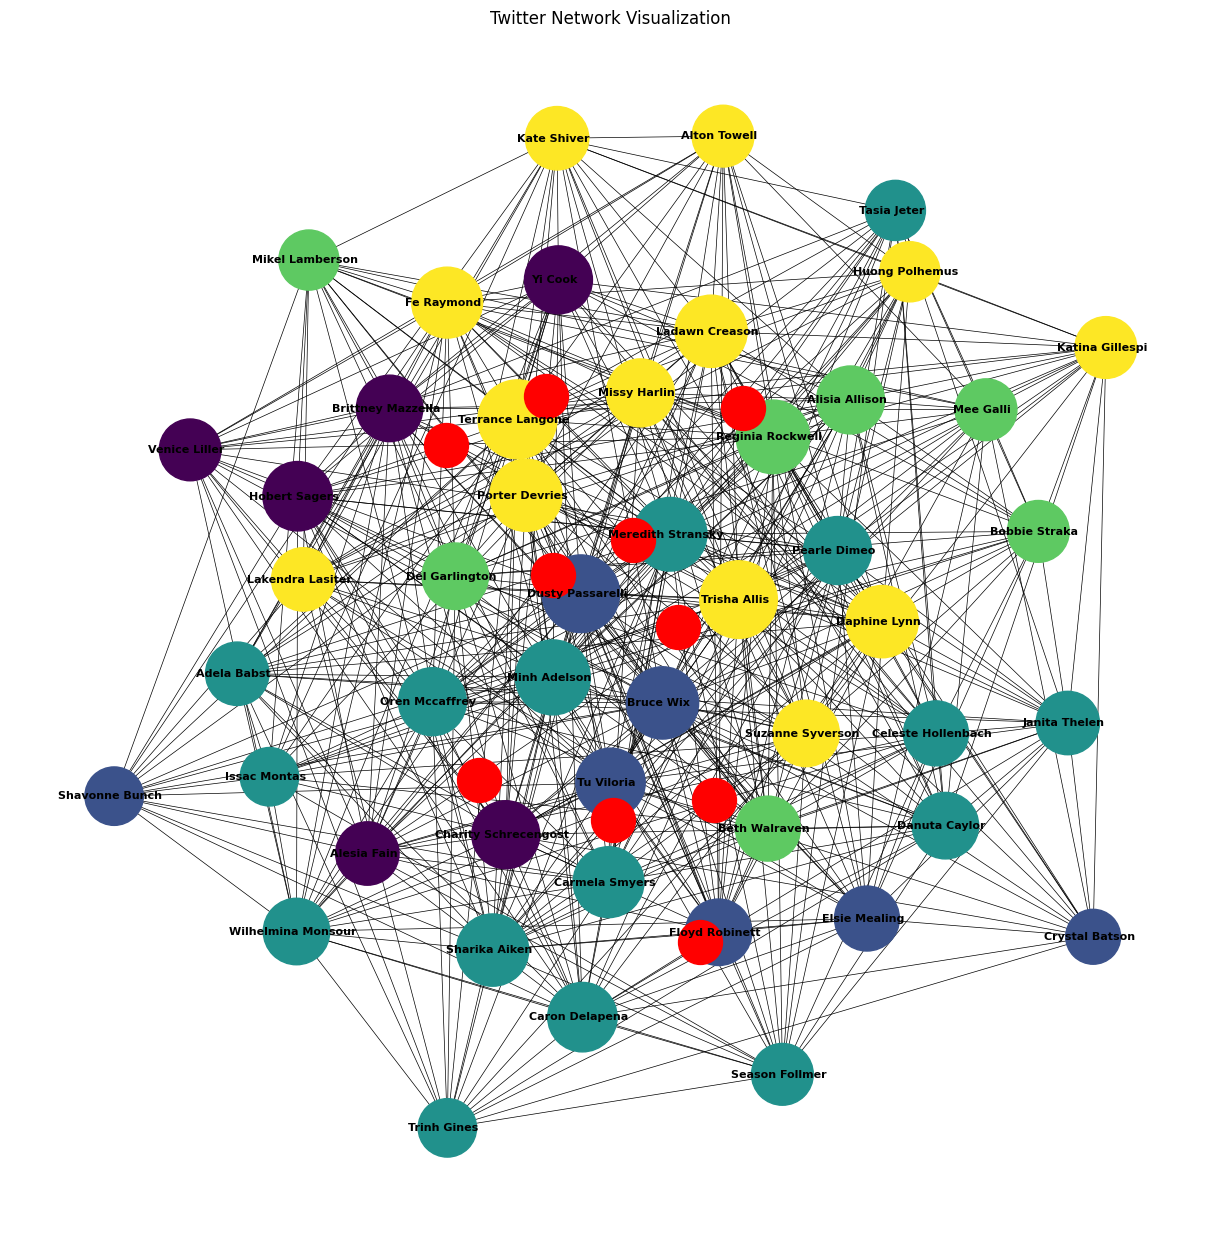

In [ ]:
# prompt: • Use NetworkX or libraries like matplotlib or Plotly to visualize the graph of one platform.
# • Highlight key nodes (e.g., high degree).
# • Optionally, use community colors to visually cluster the graph.

import matplotlib.pyplot as plt
!pip install python-louvain

import community as community_louvain
import community.community_louvain as community_louvain

def visualize_graph(graph, platform_name):
    # Find key nodes (e.g., top 10 by degree centrality)
    degree_centrality = nx.degree_centrality(graph)
    key_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]

    # Community detection using Louvain algorithm
    partition = community_louvain.best_partition(graph)

    # Node colors based on community
    node_colors = [partition[node] for node in graph.nodes()]

    # Node sizes based on degree
    node_sizes = [degree_centrality[node] * 5000 for node in graph.nodes()]

    plt.figure(figsize=(12, 12))
    nx.draw(graph, with_labels=True, node_color=node_colors, node_size=node_sizes,
            font_size=8, font_weight='bold', width=0.5, cmap=plt.cm.viridis)

    # Highlight key nodes
    nx.draw_networkx_nodes(graph, pos=nx.spring_layout(graph), nodelist=key_nodes, node_color='red', node_size=1000)

    plt.title(f"{platform_name} Network Visualization")
    plt.show()

# Visualize the graphs
visualize_graph(graph, "Facebook")
visualize_graph(graph_insta, "Instagram")
visualize_graph(graph_tw, "Twitter")


# Task 6: Cross-Platform Friend Suggestion from Twitter to Facebook

In [ ]:
# prompt: • Using the Twitter graph, identify pairs of users who are connected (i.e., one follows the other or
# interacts with them) but do not have a direct connection in the Facebook graph.
# • From these connections, suggest friends in the Facebook network.

# Find pairs of users connected in Twitter but not in Facebook
twitter_edges = set(graph_tw.edges())
facebook_edges = set(graph.edges())
twitter_only_connections = twitter_edges - facebook_edges

# Suggest friends based on Twitter connections
suggested_friends = []
for user1, user2 in twitter_only_connections:
    if user1 in graph.nodes() and user2 in graph.nodes():
        suggested_friends.append((user1, user2))

print("\n--- Suggested Friendships (Twitter to Facebook) ---")
if suggested_friends:
    for user1, user2 in suggested_friends:
        print(f"Suggest {user1} and {user2} become friends on Facebook.")
else:
    print("No friend suggestions based on Twitter connections.")



--- Suggested Friendships (Twitter to Facebook) ---
Suggest Hobert Sagers   and Venice Liller   become friends on Facebook.
Suggest Caron Delapena   and Alisia Allison   become friends on Facebook.
Suggest Brittney Mazzella   and Mikel Lamberson   become friends on Facebook.
Suggest Alesia Fain   and Bruce Wix   become friends on Facebook.
Suggest Season Follmer   and Alesia Fain   become friends on Facebook.
Suggest Ladawn Creason   and Mikel Lamberson   become friends on Facebook.
Suggest Bobbie Straka   and Bruce Wix   become friends on Facebook.
Suggest Wilhelmina Monsour   and Fe Raymond   become friends on Facebook.
Suggest Kate Shiver   and Katina Gillespi   become friends on Facebook.
Suggest Carmela Smyers   and Trisha Allis   become friends on Facebook.
Suggest Mikel Lamberson   and Reginia Rockwell   become friends on Facebook.
Suggest Floyd Robinett   and Minh Adelson   become friends on Facebook.
Suggest Ladawn Creason   and Daphine Lynn   become friends on Facebook.
Sugg

# Bonus


--- Common users between Facebook and Instagram ---
['Alton Towell \xa0', 'Issac Montas \xa0', 'Katina Gillespi \xa0', 'Trinh Gines \xa0', 'Dusty Passarelli \xa0', 'Kate Shiver \xa0', 'Floyd Robinett \xa0', 'Alisia Allison \xa0', 'Suzanne Syverson \xa0', 'Pearle Dimeo \xa0', 'Ladawn Creason \xa0', 'Charity Schrecengost \xa0', 'Adela Babst \xa0', 'Wilhelmina Monsour \xa0', 'Beth Walraven \xa0', 'Janita Thelen \xa0', 'Shavonne Bunch \xa0', 'Mikel Lamberson \xa0', 'Brittney Mazzella \xa0', 'Daphine Lynn \xa0', 'Crystal Batson \xa0', 'Danuta Caylor \xa0', 'Carmela Smyers \xa0', 'Tu Viloria \xa0', 'Hobert Sagers \xa0', 'Celeste Hollenbach \xa0', 'Tasia Jeter \xa0', 'Sharika Aiken \xa0', 'Mee Galli \xa0', 'Yi Cook \xa0', 'Porter Devries \xa0', 'Terrance Langone \xa0', 'Bruce Wix \xa0', 'Meredith Stransky \xa0', 'Bobbie Straka \xa0', 'Huong Polhemus \xa0', 'Trisha Allis \xa0', 'Season Follmer \xa0', 'Caron Delapena \xa0', 'Missy Harlin \xa0', 'Venice Liller \xa0', 'Reginia Rockwell \xa0', 'O

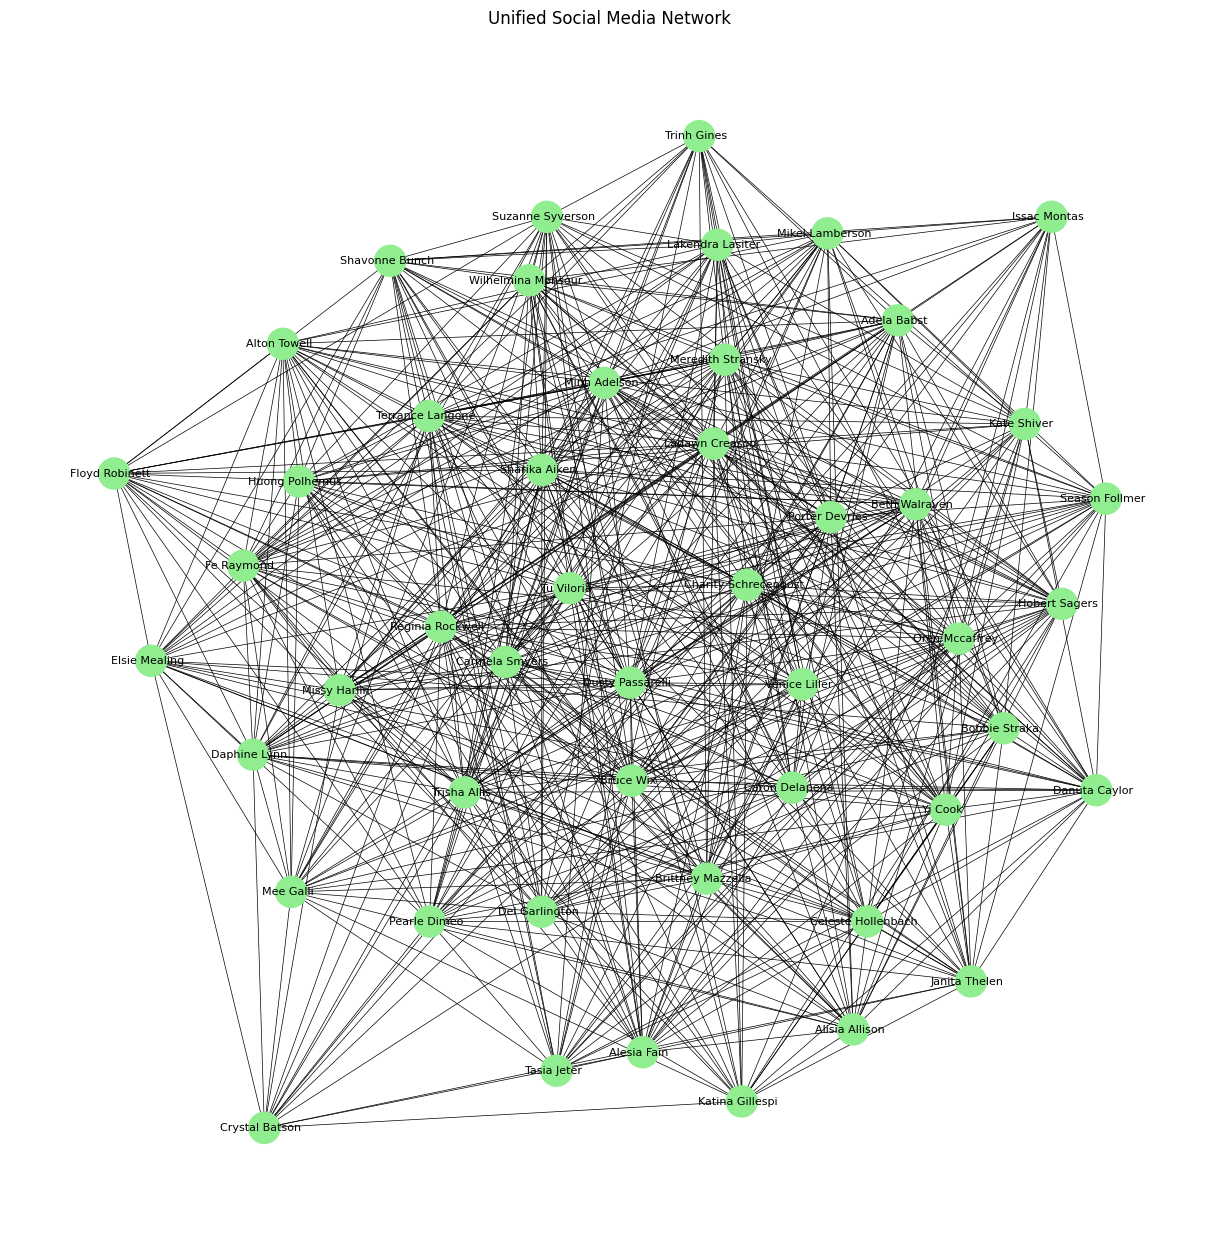

In [ ]:
# I'm merging the datasets into a unified multi-platform network and analyze cross-platform central users
# or overlapping communities

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import community.community_louvain as community_louvain


# Task 6: Cross-Platform Analysis (Enhanced)

def analyze_cross_platform(graph1, graph2, platform1_name, platform2_name):
    common_nodes = list(set(graph1.nodes()) & set(graph2.nodes()))
    print(f"\n--- Common users between {platform1_name} and {platform2_name} ---")
    if common_nodes:
        print(common_nodes)
        # Calculate Jaccard Similarity
        jaccard_similarity = len(set(graph1.edges()) & set(graph2.edges())) / len(set(graph1.edges()) | set(graph2.edges())) if (len(set(graph1.edges()) | set(graph2.edges()))) > 0 else 0
        print(f"Jaccard Similarity: {jaccard_similarity}")
    else:
        print("No common users between platforms.")


# Cross platform analysis between Facebook and Instagram
analyze_cross_platform(graph, graph_insta, "Facebook", "Instagram")

# Cross platform analysis between Instagram and Twitter
analyze_cross_platform(graph_insta, graph_tw, "Instagram", "Twitter")

# Cross platform analysis between Facebook and Twitter
analyze_cross_platform(graph, graph_tw, "Facebook", "Twitter")

# Create a unified multi-platform network
unified_graph = nx.Graph()

# Add nodes and edges from each platform
for g, platform in [(graph, 'Facebook'), (graph_insta, 'Instagram'), (graph_tw, 'Twitter')]:
    for node in g.nodes():
        unified_graph.add_node(node, platform=platform)  # Store platform information
    unified_graph.add_edges_from(g.edges())

# Community detection on the unified graph
partition_unified = community_louvain.best_partition(unified_graph)
analyze_community(unified_graph, "Unified")
# Visualize the unified graph with platform information
def visualize_unified_graph(graph):
    # Get platform information for each node
    platform_mapping = nx.get_node_attributes(graph, 'platform')

    # Node colors based on platform
    node_colors = []
    for node in graph.nodes():
        platform = platform_mapping.get(node, "Unknown")  # Handle nodes without platform
        if platform == 'Facebook':
            node_colors.append('skyblue')
        elif platform == 'Instagram':
            node_colors.append('lightcoral')
        elif platform == 'Twitter':
            node_colors.append('lightgreen')
        else:
            node_colors.append('gray')

    plt.figure(figsize=(12, 12))
    nx.draw(graph, with_labels=True, node_color=node_colors, node_size=500, font_size=8, width=0.5)
    plt.title("Unified Social Media Network")
    plt.show()


visualize_unified_graph(unified_graph)


